# Flower Classification from the Iris Dataset

Using the Iris Dataset and a Classification Decision Tree, flowers will be classified in their respective species

## Preparation
First, all relevant packages will be imported

In [360]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Now, importing the data and displaying the first couple of rows

In [361]:
## Importing iris data from the UCI repository from the URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
                  ,header=None)

## Displaying the first 5 rows
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


From the repository's site we know:
Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica

Corresponding to the columns 0 to 4

In [362]:
## Changing column names correspondingly
df.columns = ['sep_length',
              'sep_width',
              'pet_length',
              'pet_width',
              'class']
df.head()

,sep_length,sep_width,pet_length,pet_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Checking data
Checking for empty cells by looking at the data types

In [363]:
df.dtypes

sep_length    float64
sep_width     float64
pet_length    float64
pet_width     float64
class          object
dtype: object

All data seems to fit the expectations, so there might not be a need to reclassify for the x-data

In [364]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

The y-data gives three classes, the data could potentially be split-up in two separate trees: </br>
> First, finding whether the plant is setosa or versicolor,</br>
> then finding whether the plant is setosa/versicolor or virginica

From the scikit-learn site (https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html?highlight=iris), we can see the separation of the three groups:</br>
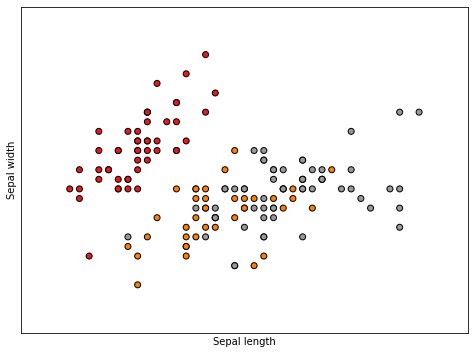</br>
For this, the iris unique values will be displayed numerically first, so that they can be classified mathematically.

In [365]:
## Changing the Iris species into values 0, 1, and 2
df['class'] = df['class'].mask(df['class'] == 'Iris-setosa', 0)
df['class'] = df['class'].mask(df['class'] == 'Iris-versicolor', 1)
df['class'] = df['class'].mask(df['class'] == 'Iris-virginica', 2).astype(int)

## Checking datatype
df.loc[0,'class']

0

In [366]:
df.head()

,sep_length,sep_width,pet_length,pet_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Changing them by masking might not be the most efficient method, a lambda-function or .repalce might have worked better.</br>
The type being an object is not a problem considering that these are classes.

---

## Creating the DecisionTree
Starting with splitting the data into X, y and train/test data

In [367]:
## Separating the data into X and y
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]
print(X.head())
print(y.head())

## Splitting the data into training and testing
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=5)

   sep_length  sep_width  pet_length  pet_width
0         5.1        3.5         1.4        0.2
1         4.9        3.0         1.4        0.2
2         4.7        3.2         1.3        0.2
3         4.6        3.1         1.5        0.2
4         5.0        3.6         1.4        0.2
   class
0      0
1      0
2      0
3      0
4      0


In [368]:
X_train.dtypes

sep_length    float64
sep_width     float64
pet_length    float64
pet_width     float64
dtype: object

In [369]:
y_train.dtypes

class    int32
dtype: object

In [373]:
Iris_clf = DecisionTreeClassifier(random_state=5)
Iris_clf = Iris_clf.fit(X_train, y_train)

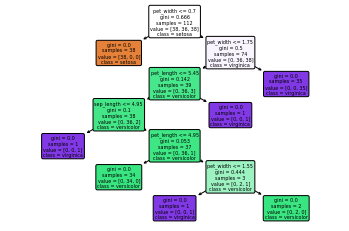

In [379]:
plot_tree(Iris_clf,
          filled=True,
          rounded=True,
          class_names=["setosa", "versicolor", "virginica"],
          feature_names=X.columns);